In [53]:
import csv
import time
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [89]:
extractQuestionAndDate()
df = pd.read_csv("weekly_data_for_visualization.csv")
#de = pd.read_csv("Qids_Score.csv")
df

#convert date to YYYY-MM-DD format
dates_milli = df["StartDate"].tolist()
date_mili_strip = [i.replace("-", "/") for i in dates_milli]
date_final = [i.split(" ")[0] for i in date_mili_strip]

date_final

converted_dates = []

print(date_final)

for i in range(0,len(date_final)):  # create a list fo dates from mili sec
    # s = int(i) / 1000.0
    # s = pd.Series(i)
    # s.head()
    if i < 2:
        converted_dates.append(date_final[i])
    else: 
        date_object = datetime.strptime(date_final[i], '%m/%d/%Y')
        converted_dates.append(date_object)
 
df["Final Date"] = converted_dates  # new conlumn of dates only, new table with "Final Date" Created

ids = df["Q317"].unique() #change to “Userid"


df = df.sort_values(by=['Q317','Final Date'],ascending=[True,True])

df.to_csv("weekly_data_for_visualization.csv") #new updated_weekly data with "Final Date" at the end of it

ids=ids[2:] #only keeping the numbers of ids

print(ids)

dayDict={}

for id in ids:
    #calculate the difference between the two adjacent datetimes

    dates = df.loc[df["Q317"]==id, 'Final Date']        
    #increment the corresponding difference #days by 1
        #adding to a list to verify (tmp)

    tmp =[]

    for date in dates:
        tmp.append(date)

    for i in range(1,len(tmp)):
        numDays = tmp[i] - tmp[i-1]
        index = str(numDays)
        key = index.split(" ")[0]
        key = int(key)
        if key not in dayDict:
            dayDict[key] = 1
        else:
            dayDict[key] += 1
        
# print(tmp)
myKeys = list(dayDict.keys())
myKeys.sort()
dayDict = {i: dayDict[i] for i in myKeys}
print(dayDict)

    # for i in range(len(dates)):
    #     df[]
    # for date in dates.iterrows():
    #     print(date)
        #if the label not already exist, create the label (n days) add 1



        #if the label (n days) exist, add it by 1 


['Start', '{"ImportId":"startDate","timeZone":"America/New_York"}', '4/15/2022', '4/17/2022', '4/21/2022', '4/22/2022', '4/22/2022', '4/22/2022', '4/24/2022', '4/28/2022', '4/29/2022', '4/29/2022', '5/1/2022', '5/5/2022', '5/6/2022', '5/6/2022', '5/8/2022', '5/12/2022', '5/13/2022', '5/6/2022', '5/15/2022', '5/19/2022', '5/20/2022', '5/20/2022', '5/20/2022', '5/22/2022', '5/26/2022', '5/27/2022', '5/28/2022', '5/29/2022', '6/2/2022', '6/3/2022', '6/3/2022', '6/5/2022', '6/9/2022', '6/10/2022', '6/10/2022', '6/12/2022', '6/17/2022', '6/19/2022', '6/23/2022', '6/24/2022', '10/26/2022', '10/31/2022', '11/1/2022', '11/1/2022', '11/2/2022', '11/3/2022', '11/7/2022', '11/8/2022', '11/10/2022', '11/11/2022', '11/14/2022', '11/15/2022', '11/16/2022', '11/17/2022', '11/21/2022', '11/22/2022', '11/22/2022', '11/23/2022', '11/24/2022', '11/27/2022', '11/28/2022', '11/29/2022', '11/29/2022', '11/30/2022', '12/1/2022', '12/1/2022', '12/5/2022', '12/6/2022', '12/6/2022', '12/7/2022', '12/8/2022', '1

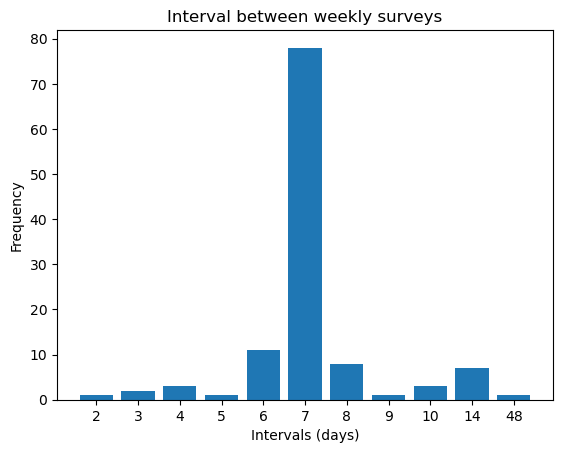

In [94]:
#plot the histogram
interval_int = list(dayDict.keys())
interval = []
for i in interval_int:
    interval.append(str(i))
num = list(dayDict.values())

plt.bar(interval, num)
plt.title("Interval between weekly surveys")
plt.xlabel("Intervals (days)")
plt.ylabel("Frequency")
plt.show()